# Logistic regression

-----------------------------------------------------

In [1]:
x = readdlm("trx.dat");
y = readdlm("try.dat");
#print(size(x));
#print(size(y));
#
(m,n) = size(x);
# reshape x to (20 x 2)
x = reshape(x, m, n);
# add x_0 (bias)
x = [ones(m,1) x];
#print(size(x));

In [2]:
#initialize fitting parameters
theta = zeros(n+1,1);

In [3]:
#Define the sigmoid funciont
function g(n)
    return 1.0 ./(1.0+ exp(-n))
end

g (generic function with 1 method)

In [4]:
# Newton's method


In [5]:
# Set iterations 
Iter = 10;
J = zeros(Iter, 1);

In [6]:
# Loop
for i in 1:Iter
    # Calculate the hypothesis fucntion
    z = x*theta;
    # Calculate sigmoid
    h = g(z);
    # Calculate gradient and hession.
    # The formulas below are equivalent to the summation formulars
    # Given in the lecture videos.
    grad = (1/m) .* x' * (h-y);
    H = (1/m) .* x' * diagm(vec(h)) * diagm(vec(1-h)) * x;
    # Calculate J for testing convergence
    J[i] = (1/m)*sum(-y .* log(h) - (1-y) .* log(1-h));
    theta = theta - H\grad;
end
print(theta)

[-17.8346; 0.162762; 0.186209]

In [7]:
# Calculate the probability that a student with 
# Score 20 on exam 1 and score 80 on exam 2
# will not be admitted
prob = 1 - g([1 20 80] * theta)

1×1 Array{Float64,2}:
 0.42132

In [8]:
print(J)

[0.693147; 0.437769; 0.402287; 0.398453; 0.398382; 0.398382; 0.398382; 0.398382; 0.398382; 0.398382]

In [9]:
using PyPlot

In [10]:
theta

3×1 Array{Float64,2}:
 -17.8346  
   0.162762
   0.186209

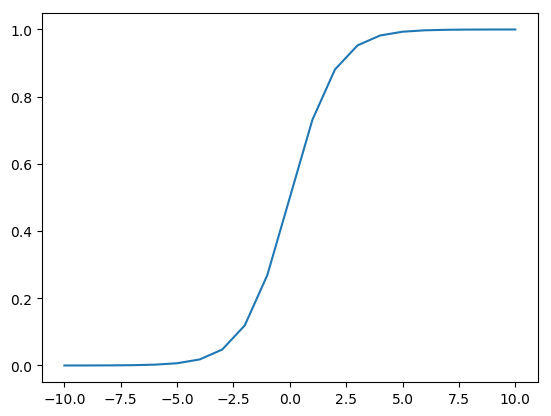

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001FA3B128>

In [11]:
smx = -10:10
smy = g(smx)
plot(smx,smy)

In [12]:
print(size(theta))
print( size(x))

(3,1)(40,3)

(40,3)


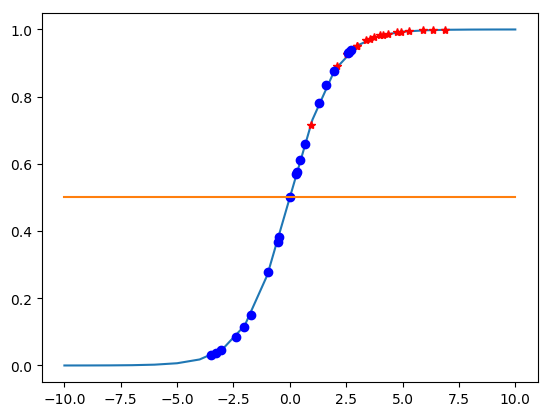

(40,1)(40,1)


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000204E1A90>

In [23]:
tex = readdlm("tex.dat");
tey = readdlm("tey.dat");
#print(size(x));
#print(size(y));
#
(m,n) = size(tex);
tex = reshape(tex, m, n);
# add x_0 (bias)
tex = [ones(m,1) tex];
println(size(tex));

smx = -10:10
smy = g(smx)
plot(smx,smy)

#plot(smx,smy)

resx =  tex * theta;
resy = g(resx);

println(size(resx),size(resy))

plot(resx[1:20],resy[1:20],"r*")
plot(resx[21:40],resy[21:40],"bo")


clx = -10:10
cly = 0.5+0.0 *clx
plot(clx,cly)


In [24]:
succ = 0.
fail = 0.
all = 0.
for i in 1:20
    if resx[i] >= 0.5
        succ +=1
    end
end
println(100. *succ/20)
for i in 21:40
    if resx[i] <0.5
        fail +=1
    end
end
println(100. *fail/20)
println(100 *(succ + fail)/40)

100.0
65.0
82.5
